In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn import metrics
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier


In [31]:
import re
import string
from collections import Counter

import spacy
import spacy.lang.tl as s_tl
tl_stopwords = s_tl.stop_words.STOP_WORDS

from sacremoses import MosesTokenizer
import simplemma as slma
mt = MosesTokenizer('tl')

def remove_tl_stopwords(x):
    no_sw = [word for word in x if word not in tl_stopwords]
    return no_sw

def clean_data_untokenized(x):
    x = re.sub("[^a-zA-Z0-9']+", " ", x)
    tokens = x.lower().split()
    # x = mt.tokenize(x)
    #tokens = [token.lower() for token in x ]
    # tokens = x.lower().split() #removes non alphabet, undercase, then splits
    no_sw = remove_tl_stopwords(tokens)
    #lemmatized_tokens = [slma.lemmatize(token, lang='tl') for token in no_sw]
    cleaned = ' '.join(no_sw)
    return cleaned

def clean_tokenize(x):
    x = mt.tokenize(x)
    tokens = [token.lower() for token in x ]
    #tokens = x.lower().split() #removes non alphabet, undercase, then splits
    no_sw = remove_tl_stopwords(tokens)
    #lemmatized_tokens = [slma.lemmatize(token, lang='tl') for token in no_sw]
    return no_sw


In [32]:
df = pd.read_pickle('Tagalog_Headlines_EngFeatures')

In [33]:
df

,Statement,Rating,cleaned,cleaned tokenized,period%,comma%,colon%,semicolon%,question mark%,exclamation mark%,dash%,apostrophe%,close parenthesis%,capitalized%,slang words%,curse words%,with numericals%,bigrams,trigrams
0,"Lalaki patay sa pamamaril sa Tondo, Maynila",Real,lalaki patay pamamaril tondo maynila,"[lalaki, patay, pamamaril, tondo, ,, maynila]",0.000000,0.125000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,"[lalaki patay, patay pamamaril, pamamaril tond...","[lalaki patay pamamaril, patay pamamaril tondo..."
1,"50 Pinoy na naipit sa kaguluhan sa Sudan, nail...",Real,50 pinoy naipit kaguluhan sudan nailikas,"[50, pinoy, naipit, kaguluhan, sudan, ,, naili...",0.000000,0.090909,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.090909,"[50 pinoy, pinoy naipit, naipit kaguluhan, kag...","[50 pinoy naipit, pinoy naipit kaguluhan, naip..."
2,#BoyingResign: Netizens galit kay DOJ Chief Re...,Real,boyingresign netizens galit kay doj chief remu...,"[#, boyingresign, :, netizens, galit, kay, doj...",0.000000,0.000000,0.055556,0.000000,0.0,0.000000,0.055556,0.0,0.0,0.055556,0.0,0.0,0.000000,"[boyingresign netizens, netizens galit, galit ...","[boyingresign netizens galit, netizens galit k..."
3,‘Backdoor entry’ ng Grab sa motorcycle taxi pi...,Real,backdoor entry grab motorcycle taxi pilot pina...,"[‘, backdoor, entry, ’, grab, motorcycle, taxi...",0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,"[backdoor entry, entry grab, grab motorcycle, ...","[backdoor entry grab, entry grab motorcycle, g..."
4,Doktor nangangamba na na-mild stroke si De Lima,Real,doktor nangangamba mild stroke de,"[doktor, nangangamba, na-mild, stroke, de]",0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.125000,0.0,0.0,0.000000,0.0,0.0,0.000000,"[doktor nangangamba, nangangamba mild, mild st...","[doktor nangangamba mild, nangangamba mild str..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3447,"Remembering Marky Cielo, Proud Igorot and Star...",Fake,remembering marky cielo proud igorot and stars...,"[remembering, marky, cielo, ,, proud, igorot, ...",0.000000,0.083333,0.000000,0.000000,0.0,0.083333,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,"[remembering marky, marky cielo, cielo proud, ...","[remembering marky cielo, marky cielo proud, c..."
3448,"Netizen, inilabas ang sekretong galit dahil la...",Fake,netizen inilabas sekretong galit lang my day k...,"[netizen, ,, inilabas, sekretong, galit, lang,...",0.000000,0.055556,0.000000,0.055556,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,"[netizen inilabas, inilabas sekretong, sekreto...","[netizen inilabas sekretong, inilabas sekreton..."
3449,"Pinoy Vlogger na tumulong kay Nas Daily noon, ...",Fake,pinoy vlogger tumulong kay nas daily nagsalita...,"[pinoy, vlogger, tumulong, kay, nas, daily, ,,...",0.041667,0.083333,0.041667,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,"[pinoy vlogger, vlogger tumulong, tumulong kay...","[pinoy vlogger tumulong, vlogger tumulong kay,..."
3450,GRABE! UNANG GABI NG LAMAY SA BUROL NI KRIS AQ...,Fake,grabe unang gabi lamay burol kris aquino dinag...,"[grabe, !, unang, gabi, lamay, burol, kris, aq...",0.050000,0.050000,0.000000,0.000000,0.0,0.050000,0.050000,0.0,0.0,0.850000,0.0,0.0,0.000000,"[grabe unang, unang gabi, gabi lamay, lamay bu...","[grabe unang gabi, unang gabi lamay, gabi lama..."


In [34]:
cols = [col for col in df.columns.values if col != 'Rating' and col != 'bigrams' and 
        col != 'trigrams' and col != 'cleaned' 
        and col != 'cleaned tokenized' and col != 'tokens']

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Rating'] = le.fit_transform(df.Rating.values)

In [36]:
x_df = df[cols]
y = df['Rating'].values

In [37]:
x_df

,Statement,period%,comma%,colon%,semicolon%,question mark%,exclamation mark%,dash%,apostrophe%,close parenthesis%,capitalized%,slang words%,curse words%,with numericals%
0,"Lalaki patay sa pamamaril sa Tondo, Maynila",0.000000,0.125000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
1,"50 Pinoy na naipit sa kaguluhan sa Sudan, nail...",0.000000,0.090909,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.090909
2,#BoyingResign: Netizens galit kay DOJ Chief Re...,0.000000,0.000000,0.055556,0.000000,0.0,0.000000,0.055556,0.0,0.0,0.055556,0.0,0.0,0.000000
3,‘Backdoor entry’ ng Grab sa motorcycle taxi pi...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
4,Doktor nangangamba na na-mild stroke si De Lima,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.125000,0.0,0.0,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3447,"Remembering Marky Cielo, Proud Igorot and Star...",0.000000,0.083333,0.000000,0.000000,0.0,0.083333,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
3448,"Netizen, inilabas ang sekretong galit dahil la...",0.000000,0.055556,0.000000,0.055556,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
3449,"Pinoy Vlogger na tumulong kay Nas Daily noon, ...",0.041667,0.083333,0.041667,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
3450,GRABE! UNANG GABI NG LAMAY SA BUROL NI KRIS AQ...,0.050000,0.050000,0.000000,0.000000,0.0,0.050000,0.050000,0.0,0.0,0.850000,0.0,0.0,0.000000


In [38]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [39]:
sentences = df['Statement'].values

In [40]:
sentences

array(['Lalaki patay sa pamamaril sa Tondo, Maynila',
       '50 Pinoy na naipit sa kaguluhan sa Sudan, nailikas na',
       '#BoyingResign: Netizens galit kay DOJ Chief Remulla matapos mahulihan ng ‘high-grade’ marijuana ang anak',
       ...,
       'Pinoy Vlogger na tumulong kay Nas Daily noon, nagsalita na: Parang ginamit lang ako, naabuso. Hindi ko na sya kilala',
       'GRABE! UNANG GABI NG LAMAY SA BUROL NI KRIS AQUINO DINAGSA NG MGA TAO, KAIBIGAN AT KAMAG-ANAK .',
       ' Isang tattoo artist may walong asawa at magkakasamang naninirahan sa iisang bubong'],
      dtype=object)

In [41]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [42]:
vectorizer = TfidfVectorizer(analyzer=clean_tokenize)
tfidf_vecs = vectorizer.fit_transform(sentences).toarray()
X = pd.concat([pd.DataFrame(tfidf_vecs), x_df], axis = 1)

In [43]:
X

,0,1,2,3,4,5,6,7,8,9,...,semicolon%,question mark%,exclamation mark%,dash%,apostrophe%,close parenthesis%,capitalized%,slang words%,curse words%,with numericals%
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.090909
2,0.000000,0.270047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.055556,0.0,0.0,0.055556,0.0,0.0,0.000000
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.125000,0.0,0.0,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3447,0.130961,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.083333,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
3448,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.055556,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
3449,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
3450,0.141574,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.050000,0.050000,0.0,0.0,0.850000,0.0,0.0,0.000000


In [44]:
vectorizer = TfidfVectorizer(analyzer=clean_tokenize)
tfidf_vecs = vectorizer.fit_transform(sentences).toarray()
#X = pd.concat([pd.DataFrame(tfidf_vecs), x_df], axis = 1)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
import joblib

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
ct = ColumnTransformer([('standard_scaler', StandardScaler(), [col for col in x_df if col != 'Statement'])])


In [45]:
transformed_feat = ct.fit_transform(x_df)
transformed_feat.shape

(3452, 13)

In [46]:
tfidf_vecs.shape

(3452, 10541)

In [47]:
import numpy as np
X = np.concatenate((tfidf_vecs, transformed_feat), axis=1)
X.shape

(3452, 10554)

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, f1_score

clfXGB = Pipeline(steps = [('XGBoost', XGBClassifier())])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49)

In [49]:
#SVM
clfSVM = Pipeline(steps = [('SVM', SVC())])
#logistic regression
clfLOGREG = Pipeline(steps = [('Logistic Regression', LogisticRegression())])
#XGBoost
clfXGB = Pipeline(steps = [('XGBoost', XGBClassifier())])
#XGBoost with tuned params
clfXGB_best =  Pipeline(steps = [('XGBoost_tuned', XGBClassifier(colsample_bytree= 0.5,
                                                            gamma=0.3,
                                                            learning_rate=0.1,
                                                            max_depth=6,
                                                            min_child_weight=1))])

#Naive Bayes
clfNB = Pipeline(steps = [('Naive Bayes', GaussianNB())])
#Random forest
clfRFC = Pipeline(steps = [('RFC', RandomForestClassifier())])
#neural netTODO

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, f1_score
models = [clfSVM, clfLOGREG, clfXGB, clfNB, clfRFC]

model_scores={}
model_rand_acc = {}


for idx, model in enumerate(models):
    model.fit(X_train, y_train)
    name = list(model.named_steps)[0]
    
    score = model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    
    model_scores[name] = score, mae, mse, f1

    

    joblib.dump(model, f'headline_classifiers_tagalog/{name}Classifier.joblib')
    print(f'model {idx+1} done')

model 1 done
model 2 done
model 3 done
model 4 done
model 5 done


In [51]:
model_scores

{'SVM': (0.7916063675832128,
  0.20839363241678727,
  0.20839363241678727,
  0.7900874635568512),
 'Logistic Regression': (0.9015918958031838,
  0.09840810419681621,
  0.09840810419681621,
  0.9022988505747127),
 'XGBoost': (0.8784370477568741,
  0.12156295224312591,
  0.12156295224312591,
  0.8789625360230547),
 'Naive Bayes': (0.8480463096960926,
  0.15195369030390737,
  0.15195369030390737,
  0.8416289592760181),
 'RFC': (0.8798842257597684,
  0.12011577424023155,
  0.12011577424023155,
  0.8815977175463625)}

In [52]:
#Hasnt been run yet come back to this later pwease

In [54]:
#finding best params for LOGREG (it has the best performance out of all the tested ML models)   (ONLY TESTING THESE PARAMS AS THEY WERE DEEMED THE MOST IMPORTANT TO SAVE RESOURCE ALLOCATION)
params={
 "max_iter" : [70, 90, 100, 500, 1000, 2000],
 "C"        : np.logspace(-4, 4, 50),
 "penalty"  : ['l1', 'l2', 'elasticnet']
    
}

In [55]:
new_clfLOGREG = LogisticRegression()
grid_search = GridSearchCV(
    estimator= new_clfLOGREG,
    param_grid=params,
    scoring = 'roc_auc',
    verbose=True,
    return_train_score=True
)

In [56]:
clfLOGREG_gs = Pipeline(steps = [('Logistic Regression', grid_search)])
clfLOGREG_gs.fit(X_train, y_train)

Fitting 5 folds for each of 900 candidates, totalling 4500 fits


c:\Users\cvaal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\cvaal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Pipeline(steps=[('Logistic Regression',
                 GridSearchCV(estimator=LogisticRegression(),
                              param_grid={'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.094...
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                                          'max_iter': [70, 90, 100, 500, 1000,
                                                       2000],
                                          'penalty': ['l1', 'l2',
                   

In [57]:
grid_search.best_params_

{'C': 10000.0, 'max_iter': 500, 'penalty': 'l2'}

In [58]:
grid_search.best_score_

0.9718545526840459

In [59]:
model = grid_search.best_estimator_

score = model.score(X_test, y_test)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(score, mae, mse, f1)

0.918958031837916 0.08104196816208394 0.08104196816208394 0.9166666666666667


In [60]:
grid_search.cv_results_

{'mean_fit_time': array([0.12756796, 0.58702912, 0.06610842, 0.06880441, 0.29840722,
        0.06456161, 0.06880665, 0.32025313, 0.06732206, 0.07543149,
        0.31489344, 0.07200732, 0.07419448, 0.29589267, 0.06548305,
        0.06402874, 0.34119015, 0.0682126 , 0.06641731, 0.324928  ,
        0.06761961, 0.06887784, 0.27985516, 0.06469707, 0.06283755,
        0.28194304, 0.06062675, 0.06652327, 0.27108541, 0.06353307,
        0.0646246 , 0.2986505 , 0.06163993, 0.06302953, 0.26928458,
        0.06263814, 0.0618413 , 0.27157493, 0.06134138, 0.06341414,
        0.28949399, 0.06570091, 0.06143017, 0.28663802, 0.06780791,
        0.0642312 , 0.30354776, 0.06177268, 0.06236215, 0.28756404,
        0.06035275, 0.06322355, 0.27148414, 0.0612957 , 0.0624331 ,
        0.28029075, 0.06578012, 0.06715703, 0.29620667, 0.05865016,
        0.0644505 , 0.30967646, 0.08104901, 0.07082367, 0.29392362,
        0.06829462, 0.06666646, 0.34819937, 0.06814733, 0.06802349,
        0.28035951, 0.06087933,

In [62]:
joblib.dump(model, f'headline_classifiers_tagalog/LOGREG_GSCV_Classifier.joblib')

['headline_classifiers_tagalog/LOGREG_GSCV_Classifier.joblib']

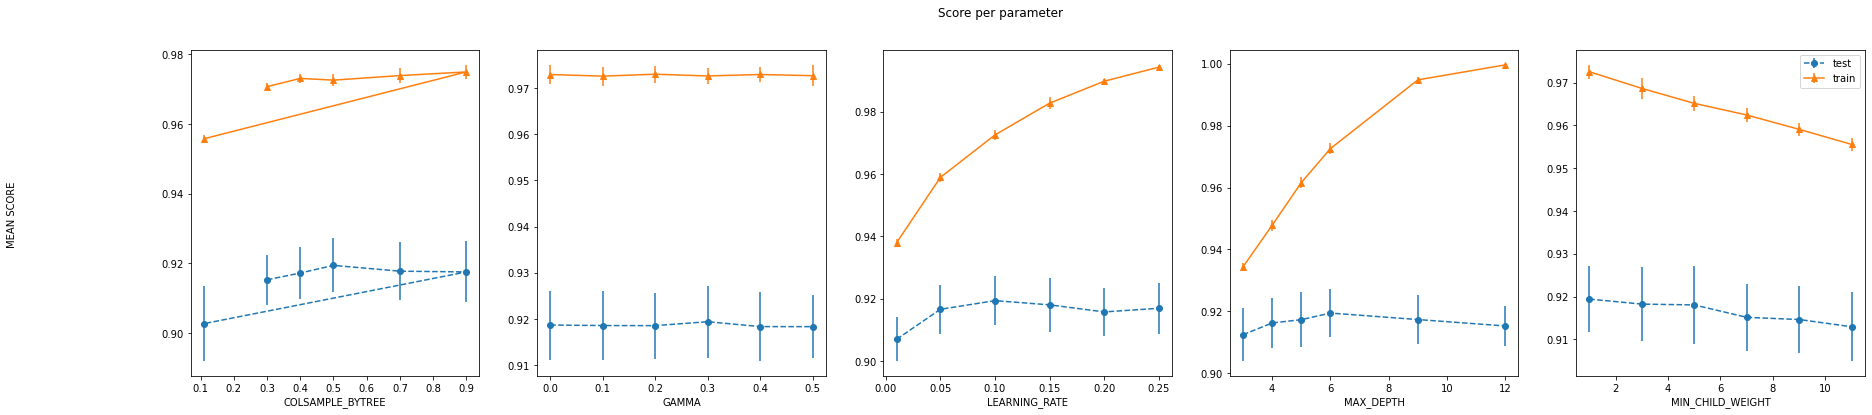

In [24]:
import matplotlib.pyplot as plt
def plot_search_results(grid):
    """
    Params: 
        grid: A trained GridSearchCV object.
    """
    ## Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']
    means_train = results['mean_train_score']
    stds_train = results['std_train_score']

    ## Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='none',figsize=(30,6))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()
plot_search_results(grid_search)

In [24]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences)

In [25]:
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.2, random_state=45)
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

In [26]:
from keras.preprocessing.sequence import pad_sequences
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [27]:
X_train.shape

(5238, 100)

In [28]:
from keras.models import Sequential
from keras import layers
model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [31]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

In [32]:
embedding_dim = 100
embedding_matrix = create_embedding_matrix(
    'glove/glove.6B.100d.txt',
    tokenizer.word_index, embedding_dim)

In [33]:
vocab_size = len(tokenizer.word_index) + 1

In [34]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          1377000   
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,442,429
Trainable params: 1,442,429
Non-trainable params: 0
____________________________________________

In [35]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

Epoch 1/10


: 

: 

In [24]:
model.compile(loss='binary_crossentropy', 
               optimizer='adam', 
               metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                116210    
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 116,221
Trainable params: 116,221
Non-trainable params: 0
_________________________________________________________________


In [25]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=32)

Epoch 1/100


c:\Users\cvaal\anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:448: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 10), dtype=float32), dense_shape=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


164/164 [==============================] - 3s 7ms/step - loss: 0.6250 - accuracy: 0.7289 - val_loss: 0.5273 - val_accuracy: 0.8160
Epoch 2/100
164/164 [==============================] - 1s 6ms/step - loss: 0.3986 - accuracy: 0.8921 - val_loss: 0.4124 - val_accuracy: 0.8321
Epoch 3/100
164/164 [==============================] - 1s 6ms/step - loss: 0.2470 - accuracy: 0.9414 - val_loss: 0.3695 - val_accuracy: 0.8405
Epoch 4/100
164/164 [==============================] - 1s 6ms/step - loss: 0.1617 - accuracy: 0.9704 - val_loss: 0.3560 - val_accuracy: 0.8420
Epoch 5/100
164/164 [==============================] - 1s 7ms/step - loss: 0.1108 - accuracy: 0.9845 - val_loss: 0.3569 - val_accuracy: 0.8382
Epoch 6/100
164/164 [==============================] - 1s 6ms/step - loss: 0.0782 - accuracy: 0.9914 - val_loss: 0.3625 - val_accuracy: 0.8359
Epoch 7/100
164/164 [==============================] - 1s 6ms/step - loss: 0.0568 - accuracy: 0.9952 - val_loss: 0.3713 - val_accuracy: 0.8351
Epoch 8/100

In [26]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print(f"Training Accuracy: {accuracy}")
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print(f"Testing Accuracy:  {accuracy}")

Training Accuracy: 0.9998090863227844
Testing Accuracy:  0.8122137188911438


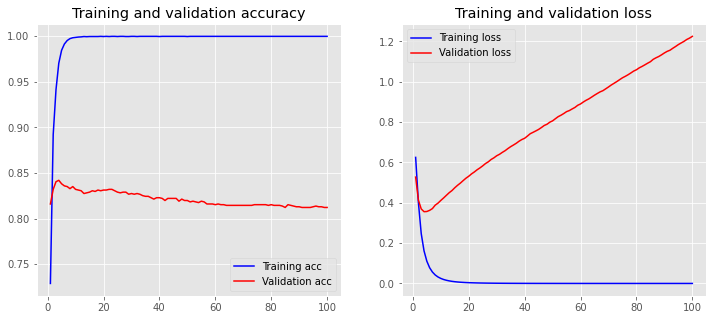

In [28]:
plot_history(history)

In [29]:
tf.keras.backend.clear_session()

In [33]:
print(sentences_train[2])

Church of England Declares ‘Jesus Is Non-Binary’


In [34]:
print(X_train[2])

[484, 4, 932, 506, 10, 1112]


In [37]:
embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 50)           688500    
                                                                 
 global_max_pooling1d (Globa  (None, 50)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 10)                510       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 689,021
Trainable params: 689,021
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
524/524 [==============================] - 5s 8ms/step - loss: 0.6134 - accuracy: 0.7003 - val_loss: 0.4681 - val_accuracy: 0.8023
Epoch 2/20
524/524 [==============================] - 4s 8ms/step - loss: 0.3042 - accuracy: 0.8881 - val_loss: 0.3346 - val_accuracy: 0.8534
Epoch 3/20
524/524 [==============================] - 4s 8ms/step - loss: 0.1335 - accuracy: 0.9586 - val_loss: 0.3388 - val_accuracy: 0.8603
Epoch 4/20
524/524 [==============================] - 4s 8ms/step - loss: 0.0532 - accuracy: 0.9878 - val_loss: 0.3775 - val_accuracy: 0.8466
Epoch 5/20
524/524 [==============================] - 4s 8ms/step - loss: 0.0196 - accuracy: 0.9981 - val_loss: 0.4128 - val_accuracy: 0.8389
Epoch 6/20
524/524 [==============================] - 4s 9ms/step - loss: 0.0085 - accuracy: 0.9994 - val_loss: 0.4433 - val_accuracy: 0.8389
Epoch 7/20
524/524 [==============================] - 5s 9ms/step - loss: 0.0040 - accuracy: 0.9996 - val_loss: 0.4853 - val_accuracy: 0.8435
Epoch 

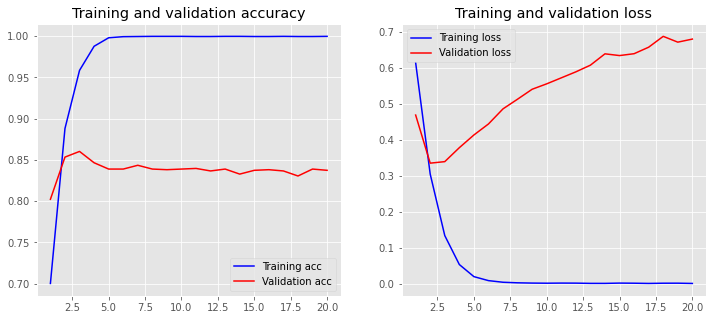

In [38]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [42]:
tf.keras.backend.clear_session()

In [43]:

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=True))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          1377000   
                                                                 
 global_max_pooling1d (Globa  (None, 100)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 10)                1010      
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,378,021
Trainable params: 1,378,021
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
524/524 [==============================] - 4s 6ms/step - loss: 0.6752 - accuracy: 0.5836 - val_loss: 0.6106 - val_accuracy: 0.7252
Epoch 2/50
524/524 [==============================] - 3s 6ms/step - loss: 0.5121 - accuracy: 0.7591 - val_loss: 0.4503 - val_accuracy: 0.7863
Epoch 3/50
524/524 [==============================] - 3s 6ms/step - loss: 0.3502 - accuracy: 0.8511 - val_loss: 0.4069 - val_accuracy: 0.8038
Epoch 4/50
524/524 [==============================] - 3s 6ms/step - loss: 0.2377 - accuracy: 0.9049 - val_loss: 0.3776 - val_accuracy: 0.8252
Epoch 5/50
524/524 [==============================] - 4s 7ms/step - loss: 0.1546 - accuracy: 0.9488 - val_loss: 0.3853 - val_accuracy: 0.8313
Epoch 6/50
524/524 [==============================] - 4s 7ms/step - loss: 0.0933 - accuracy: 0.9727 - val_loss: 0.4012 - val_accuracy: 0.8382
Epoch 7/50
524/524 [==============================] - 3s 7ms/step - loss: 0.0561 - accuracy: 0.9863 - val_loss: 0.4263 - val_accuracy: 0.8382
Epoch 

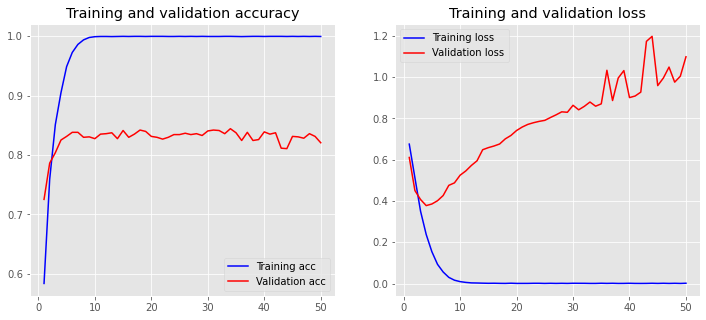

In [44]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [45]:
tf.keras.backend.clear_session()